In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cvxpy as cp

import polyscope as ps

In [ ]:
def SigmoidalBasis(A,b,x):
    
    n = len(A)
    coef = np.array(len(x)*[b]).T

    u = A @ x.T + coef
    return np.fmax(u,0)

def LogCost(X,Y):
    cost = np.empty((len(X),len(Y)))

    for i in range(len(X)):
        for j in range(len(Y)):
            cost[i,j] = np.log(1-X[i] @ Y[j])

    return cost

def ReflectorOT(X,Y,logcost,A,b):

    phi_basis = SigmoidalBasis(A,b,X)
    psi_basis = SigmoidalBasis(A,b,Y)
    
    phi = cp.Variable(len(phi_basis.T[0]))
    psi = cp.Variable(len(psi_basis.T[0]))

    constraints = [cp.bmat(len(X)*[phi_basis.T @ phi]) + cp.bmat(len(Y)*[psi_basis.T @ psi]).T  <= logcost]

    prob = cp.Problem(cp.Maximize(cp.mean(phi_basis.T @ phi)  + cp.mean(psi_basis.T @ psi)), constraints)

    prob.solve(verbose= False, solver = 'SCS')

    return phi.value, psi.value, phi_basis, psi_basis


def RandSphereCap(x,v1,v2,r,N):
    r = np.random.uniform(0,r,size=N)
    theta = np.random.uniform(0,2*np.pi,size=N)

    flat_points = np.array([ np.sqrt(r[i])*(np.cos(theta[i])*v1+np.sin(theta[i])*v2) for i in range(N)])

    points = [h + np.sqrt(1-h@h)*x for h in flat_points]
    
    return np.array(points)


In [4]:
e = np.eye(3)
N = 100

X = RandSphereCap(e[0],e[1],e[2],0.3,N)
Y = RandSphereCap(e[1],e[0],e[2],0.2,N)

C = LogCost(X,Y)

In [ ]:
ps.init()
ps.set_ground_plane_mode("none")

s_cloud = ps.register_point_cloud("source", X)
s_cloud.set_radius(0.005)
s_cloud.set_point_render_mode("sphere")

t_cloud = ps.register_point_cloud("target", Y)
t_cloud.set_radius(0.005)
t_cloud.set_point_render_mode("sphere")

s_cloud.set_color((0.10, 0.60, 0.90))  # blue
t_cloud.set_color((0.90, 0.20, 0.20))  # red

#ps.show()


[polyscope] Backend: openGL3_glfw -- Loaded openGL version: 4.1 Metal - 83.1


: 

In [4]:
k = 50 # number of neurons

A = 10*(np.random.rand(k,3)-(0.5)*np.ones((k,3)) )
b = 10*(np.random.rand(k)-0.5*np.ones(k))

phi, basis1, basis2 = ReflectorOT(X,Y,C,A,b)

/opt/anaconda3/envs/LinOpt2/lib/python3.10/site-packages/cvxpy/problems/problem.py:164: UserWarning: Constraint #0 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


In [8]:
phi_vals = basis1.T @ phi
rho = np.exp(phi_vals)

R = np.empty(X.shape)
for k in range(len(rho)):
    R[k] = rho[k]*X[k]


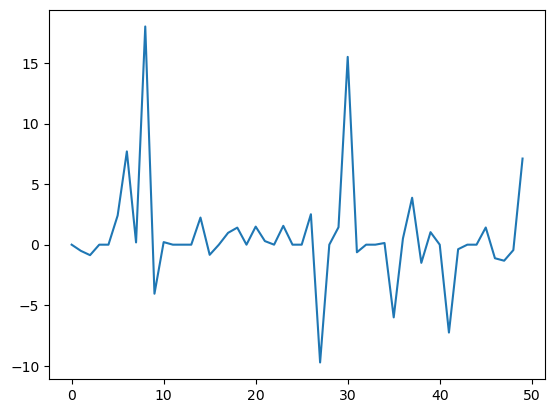

In [9]:
plt.plot(phi)

In [6]:


ps.init()
ps.set_ground_plane_mode("none")

s_cloud = ps.register_point_cloud("source", X)
s_cloud.set_radius(0.005)
s_cloud.set_point_render_mode("sphere")

t_cloud = ps.register_point_cloud("target", Y)
t_cloud.set_radius(0.005)
t_cloud.set_point_render_mode("sphere")

r_cloud = ps.register_point_cloud("reflector", R)
r_cloud.set_radius(0.005)
r_cloud.set_point_render_mode("sphere")

s_cloud.set_color((0.10, 0.60, 0.90))  # blue
t_cloud.set_color((0.90, 0.20, 0.20))  # red
r_cloud.set_color((0.10, 0.80, 0.10))  # green


#ps.show()


[polyscope] Backend: openGL3_glfw -- Loaded openGL version: 4.1 Metal - 83.1
